<a href="https://colab.research.google.com/github/pmckim1/Capstone/blob/main/EDA_2_Yearly_gantt_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install chart_studio
!pip install fuzzywuzzy

In [11]:
!pip uninstall -y plotly
!pip install plotly>=4.9
import plotly
import plotly.graph_objects as go
!pip freeze

Uninstalling plotly-4.14.3:
  Successfully uninstalled plotly-4.14.3
absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.3.0
audioread==2.1.9
autograd==1.3
Babel==2.9.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.1
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.2.1
catalogue==1.0.0
certifi==2020.12.5
cffi==1.14.5
chainer==7.4.0
chardet==3.0.4
chart-studio==1.1.0
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.22
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==

In [12]:
import numpy as np
from google.colab import drive
import json 
import sys
import pandas as pd
import datetime as dt
import warnings
import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import string
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# Mount Google Drive
drive.mount('/content/drive')

# plotly chart
user_name="mckimpc1"
apikey="aATDz6HtDgXUHFH2kRiH"

chart_studio.tools.set_credentials_file(username=user_name, api_key=apikey)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/capstone/capstone/Data/Guardian/'

df = pd.read_csv(abspath_curr +'stream-topped-2.csv', header=0)
#df=df.drop(["Unnamed: 0"], axis=1)
df2 = pd.read_csv(abspath_curr +'stream-topped-1.csv', header=0)
df3=pd.read_csv(abspath_curr +'stream-topped_5_to_9_third.csv', header=0)

df=pd.concat([df, df2], axis=0)
df=pd.concat([df, df3], axis=0)


In [14]:
df["v_hier_infomap_comm"] = df["v_hier_infomap_comm"].astype(str)
df["top_what_answer"] = df["top_what_answer"].astype(str)

df["headline"] = df["headline"].astype(str)

#** double check this data 
df=df.drop(["Unnamed: 0", "timeset"], axis=1)
print(df.columns)

df=df.dropna()

df['cluster_counts_new'] = df.groupby('v_hier_infomap_comm')['v_hier_infomap_comm'].transform('count')
df=df[['top_who_answer', 'top_what_answer',
       'top_when_answer', 'top_where_answer', 'top_why_answer',
       'top_how_answer', "pub_date_dto", "headline", "v_hier_infomap_comm", 'cluster_counts_new', "cluster_counts"]]
df

Index(['t', 'pub_date', 'sectionid', 'sectionname', 'headline', 'text',
       'pub_date_dto', 'v_id', 'Id', 'Label', 'v_name', 'v_hier_infomap_comm',
       'v_url', 'headline_tokens', 'headline_lemma', 'headline_pos',
       'headline_ents', 'head_ents_label', 'text_tokens', 'text_lemma',
       'text_pos', 'text_ents', 'text_ents_label', 'cluster_counts',
       'top_who_answer', 'top_what_answer', 'top_when_answer',
       'top_where_answer', 'top_why_answer', 'top_how_answer'],
      dtype='object')


,top_who_answer,top_what_answer,top_when_answer,top_where_answer,top_why_answer,top_how_answer,pub_date_dto,headline,v_hier_infomap_comm,cluster_counts_new,cluster_counts
1,Nimr ‚ Äôs,staunch and vocal support but have frequently ...,the same day,Saudi Arabia,Nimr ‚ Äôs,the Shia have a majority but have frequently c...,2016-01-02,Sheikh Nimr al-Nimr: Shia cleric was a thorn i...,147:1,20,20
2,the killing of Sheikh Nimr al-Nimr,would prompt widespread anger,Friday,Saudi Arabia,The Iranian government and religious leaders a...,‚ Äôs execution of a prominent Shia cleric and...,2016-01-02,Saudi execution of Shia cleric sparks outrage ...,147:1,20,20
3,Nimr,was an advocate,New Year,Tehran,Nimr ‚ Äôs merciless dispatch will,leading Shia Muslim cleric who was the most pr...,2016-01-02,Saudi executions put ball of regional tension ...,147:1,20,20
4,the US,"has warned , joining a chorus",Sunday,Saudi Arabia,because the international standards for fair t...,‚ Äôs execution of prominent Shia cleric Sheik...,2016-01-03,US warns Saudi Arabia's execution of prominent...,147:1,20,20
5,Shia Islamic leaders on Sunday,"have stepped up their condemnation , who are y...",Sunday,Riyadh,Shia Islamic leaders on Sunday,Shia Islamic leaders on Sunday have stepped up...,2016-01-03,Saudi execution: call for west to condemn kill...,147:1,20,20
...,...,...,...,...,...,...,...,...,...,...,...
10574,Cuomo,would not resign as New York governor,Wednesday,New York,because of his direct briefings last year on t...,and global prominence because of his direct br...,2021-03-03,Andrew Cuomo says he will not quit over sexual...,839,6,6
10575,the coup,happened on the first,11am .,Myanmar,At least 38 people,the worst day of violence since the military c...,2021-03-03,Dozens killed in Myanmar's worst day of violen...,1:2:1:4,8,8
10576,"Tanden , president of the Center for American ...","decided to withdraw her candidacy , in the face",Tuesday,Tanden,senators,first major loss for the still young Biden adm...,2021-03-03,Scramble on to replace Neera Tanden after nomi...,1:1:6:4:1,5,5
10577,TikTok,has been urged to take action,8pm,Myanmar,TikTok,in military uniform threatening to kill anti-c...,2021-03-03,TikTok urged to take action over Myanmar death...,1:2:1:4,8,8


In [15]:

value_counts=df.v_hier_infomap_comm.value_counts()

print(value_counts.head(70))

3:1:1       76
5:1:1       71
7:1:1       53
1:1:1:1     49
4:1:1       48
            ..
1:1:2:3     24
60:1:1      24
31:1:1:1    23
1:1:1:4     23
62:1        23
Name: v_hier_infomap_comm, Length: 70, dtype: int64


In [16]:
# lowercase everything 

df=df.apply(lambda x: x.astype(str).str.lower() if(x.dtype == 'object') else x)

df["top_who_answer"]=df['top_who_answer'].str.lower()
df["top_what_answer"]=df['top_what_answer'].str.lower()
df["top_when_answer"]=df['top_when_answer'].str.lower()
df["top_where_answer"]=df['top_where_answer'].str.lower()
df["top_why_answer"]=df['top_why_answer'].str.lower()
df["top_how_answer"]=df['top_how_answer'].str.lower()


# Define the function to remove the punctuation
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series
df['top_who_answer'] = df['top_who_answer'].apply(remove_punctuations)
df['top_what_answer'] = df['top_what_answer'].apply(remove_punctuations)
df['top_when_answer'] = df['top_when_answer'].apply(remove_punctuations)
df['top_where_answer'] = df['top_where_answer'].apply(remove_punctuations)
df['top_why_answer'] = df['top_why_answer'].apply(remove_punctuations)
df['top_how_answer'] = df['top_how_answer'].apply(remove_punctuations)


df['top_who_answer'] = df['top_who_answer'].str.replace('they','')
df['top_who_answer'] = df['top_who_answer'].str.replace('I','')
df['top_why_answer'] = df['top_why_answer'].str.replace('they','')

df['top_who_answer'] = df['top_who_answer'].str.replace(' ',' ')
df['top_who_answer'] = df['top_who_answer'].str.replace('donald trump donald trump','donald trump')
df['top_who_answer'] = df['top_who_answer'].str.replace('trump','donald trump')
df['top_who_answer'] = df['top_who_answer'].str.replace('donald donald trump','donald trump')
df['top_where_answer'] = df['top_where_answer'].str.replace('us','united states')
df['top_where_answer'] = df['top_where_answer'].str.replace('uk','united kingdom')

print(len(df))
df = df[df['cluster_counts_new'] >= 20]

print(len(df))

18185
3027


In [17]:
# gantt= df1.sort_values(by='pub_date_dto').groupby('v_hier_infomap_comm').agg({'pub_date_dto': max, 'pub_date_dto':min})
gantt_df = pd.DataFrame(columns=["Clusters", "Begin", "End", "v_hier_infomap_comm_count"])
# print(df1.head(1))
for cluster_name in df['v_hier_infomap_comm'].unique().tolist():
  cluster_df = df[df["v_hier_infomap_comm"] == cluster_name]
  v_hier_infomap_comm_count=len(cluster_df)

  every_publication_date = cluster_df["pub_date_dto"].unique().tolist()
  every_publication_date_dto = [dt.datetime.strptime(publication_date, "%Y-%m-%d") for publication_date in every_publication_date]
  # print(every_publication_date)
  # if len(every_publication_date) < 2:
  #   continue
  min_pub_date_dto = min(every_publication_date_dto)
  max_pub_date_dto = max(every_publication_date_dto)
  # Push the max day up by 1, to include that day.
  max_pub_date_dto = max_pub_date_dto + dt.timedelta(days=1)

  cluster_dict = {
      'Clusters': cluster_name,
      'Begin': min_pub_date_dto.strftime("%Y-%m-%d"),
      'End': max_pub_date_dto.strftime("%Y-%m-%d"),
      'v_hier_infomap_comm_count':v_hier_infomap_comm_count
  }
  # print(cluster_dict)
  gantt_df = gantt_df.append(cluster_dict, ignore_index=True)



gantt_df["v_hier_infomap_comm_count"] = gantt_df["v_hier_infomap_comm_count"].astype(int)


gantt_df_2016_1=gantt_df.query("Begin >= '2016-01-1' and Begin <='2016-06-30'")
gantt_df_2016_2=gantt_df.query("Begin >= '2016-07-1' and Begin <='2016-12-31'")
gantt_df_2017_1=gantt_df.query("Begin >= '2017-01-1' and Begin <='2017-06-30'")
gantt_df_2017_2=gantt_df.query("Begin >= '2017-07-1' and Begin <='2017-12-31'")
gantt_df_2018_1=gantt_df.query("Begin >= '2018-01-1' and Begin <='2018-06-30'")
gantt_df_2018_2=gantt_df.query("Begin >= '2018-07-1' and Begin <='2018-12-31'")
gantt_df_2019_1=gantt_df.query("Begin >= '2019-01-1' and Begin <='2019-06-30'")
gantt_df_2019_2=gantt_df.query("Begin >= '2019-07-1' and Begin <='2019-12-31'")
gantt_df_2020_1=gantt_df.query("Begin >= '2020-01-1' and Begin <='2020-06-30'")
gantt_df_2020_2=gantt_df.query("Begin >= '2020-07-1' and Begin <='2020-12-31'")
gantt_df_2021=gantt_df.query("Begin >= '2021-01-1' and Begin <='2021-03-10'")

gantt_df=gantt_df.sort_values("v_hier_infomap_comm_count")

In [18]:
import plotly.express as px
fig = px.timeline(gantt_df_2016_1, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters First Half of 2016", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

fig = px.timeline(gantt_df_2016_2, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters Second Half of 2016", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()


fig = px.timeline(gantt_df_2017_1, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters First Half of 2017", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

fig = px.timeline(gantt_df_2017_2, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters Second Half of 2017", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()
#py.plot(fig,filename="half_year_gantt_example",auto_open=False)

fig = px.timeline(gantt_df_2018_1, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters First Half of 2018", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

fig = px.timeline(gantt_df_2018_2, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters Second Half of 2018", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

fig = px.timeline(gantt_df_2019_1, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters First Half of 2019", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

fig = px.timeline(gantt_df_2019_2, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters Second Half of 2019", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

fig = px.timeline(gantt_df_2020_1, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters First Half of 2020", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

fig = px.timeline(gantt_df_2020_2, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters Second Half of 2020", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

fig = px.timeline(gantt_df_2021, x_start="Begin", x_end="End", y="Clusters", color="v_hier_infomap_comm_count", title= "Length and Size of Narrative Clusters 2021", color_continuous_scale=px.colors.sequential.Jet)
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

# Network Analysis Full Corpus 


In [19]:
# set colors for network charts 
who_color="#00FF00"#bright green  
what_color="#0000FF" #royal Blue 
where_color="#339933" # forest green 
when_color="#ffff00" # yellow 
why_color="#ff3300" # orange  
how_color="#33ffff" # aqua 

In [20]:
g = nx.Graph()
for index, row in df.iterrows():
    g.add_node(row['v_hier_infomap_comm'], color="#ff33cc")
    # g.add_node(row['v_hier_infomap_comm'], color="#ff0000", size=30)
    g.add_node(row['top_who_answer'], color=who_color)
    g.add_edge(row['v_hier_infomap_comm'], row['top_who_answer'])  # , edge_color=row['unix_time_normalized'])
g_positions = nx.circular_layout(g)

edge_x = []
edge_y = []
edge_z = []
edge_color = []
neighbor_count = {}
for edge in g.edges():
    x0, y0 = g_positions[edge[0]]
    x1, y1 = g_positions[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)
    edge_z.append(0)
    edge_z.append(0)
    edge_z.append(None)
    edge_node_a = edge[0]
    edge_node_b = edge[1]

    neighbor_count[edge_node_a] = 1 + neighbor_count.get(edge_node_a, 0)
    neighbor_count[edge_node_b] = 1 + neighbor_count.get(edge_node_b, 0)
# edge_color.append(convert_normalized_value_to_color(g.edges[edge]['edge_color']))

edge_trace = go.Scatter3d(
    x=edge_x,
    y=edge_y,
    z=edge_z,
    line=dict(
        width=0.5,
    ),
    hoverinfo='none',
    mode='lines',
)

node_c = []
node_t = []
node_r = []
node_x = []
node_y = []
node_z = []

for node_name in g.nodes():
    # print(g_positions[node])
    x, y = g_positions[node_name]
    node_color = g.nodes[node_name]['color']
    node_t.append("Group: " + str(node_name) + " Neighbors: " + str(neighbor_count[node_name]))
    node_c.append(node_color)
    if node_color != who_color:
        radius = 1
    else:
        radius = neighbor_count[node_name]
    node_r.append(radius)
    node_x.append(x)
    node_y.append(y)
    node_z.append(0)

node_trace = go.Scatter3d(
    x=node_x,
    y=node_y,
    z=node_z,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        reversescale=False,
        colorbar=dict(
            thickness=1,
            title='Node Connections',
            xanchor='left',
            titleside='right',
        ),
        line_width=2
    )
)

node_trace.marker.color = node_c
node_trace.marker.size = node_r
node_trace.text = node_t

fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='<br>Full Corpus Networks (Whos connected to Clusters)',
        # titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[dict(
            text="Full Corpus Networks (Whos connected to Clusters)",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0.005,
            y=-0.002
        )],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
)
fig.show()
#py.plot(fig,filename="who_full_network_corpus",auto_open=False)
print("Done at last.")

Done at last.


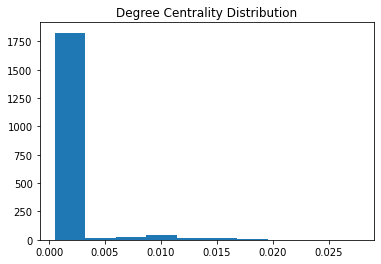

In [23]:

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(g)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.title("Degree Centrality Distribution")
plt.show()

#